# Código de reconhecimento de frutas com aprendizado de máquina

## Importando bibliotecas e configurações iniciais

In [10]:
import cv2
import dlib
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0,8.0)
import seaborn
import numpy as np
from random import randint
from os import listdir, path, makedirs
from os.path import isfile, join
import shutil
from sklearn.metrics import accuracy_score

Neste bloco nós importamos as bibliotecas necessárias para o código.
CV2 para processamento de imagens;
Dlib para detectar características;
Matplotlib e Seaborn para visualização de dados;
Numpy para manipulação de matrizes;
Os e Shutil para manipulação de arquivos e diretórios;
Sklearn para avaliação do modelo.

## Leitura e visualização das imagens

In [11]:
fruta_1 = cv2.imread("imagens/frutas/s01_01.jpg")
fruta_1 = cv2.cvtColor(fruta_1, cv2.COLOR_BGR2RGB)
fruta_2 = cv2.imread("imagens/frutas/s02_01.jpg")
fruta_2 = cv2.cvtColor(fruta_2, cv2.COLOR_BGR2RGB)
fruta_3 = cv2.imread("imagens/frutas/s03_01.jpg")
fruta_3 = cv2.cvtColor(fruta_3, cv2.COLOR_BGR2RGB)

Aqui nós lemos 3 imagens de frutas da pasta

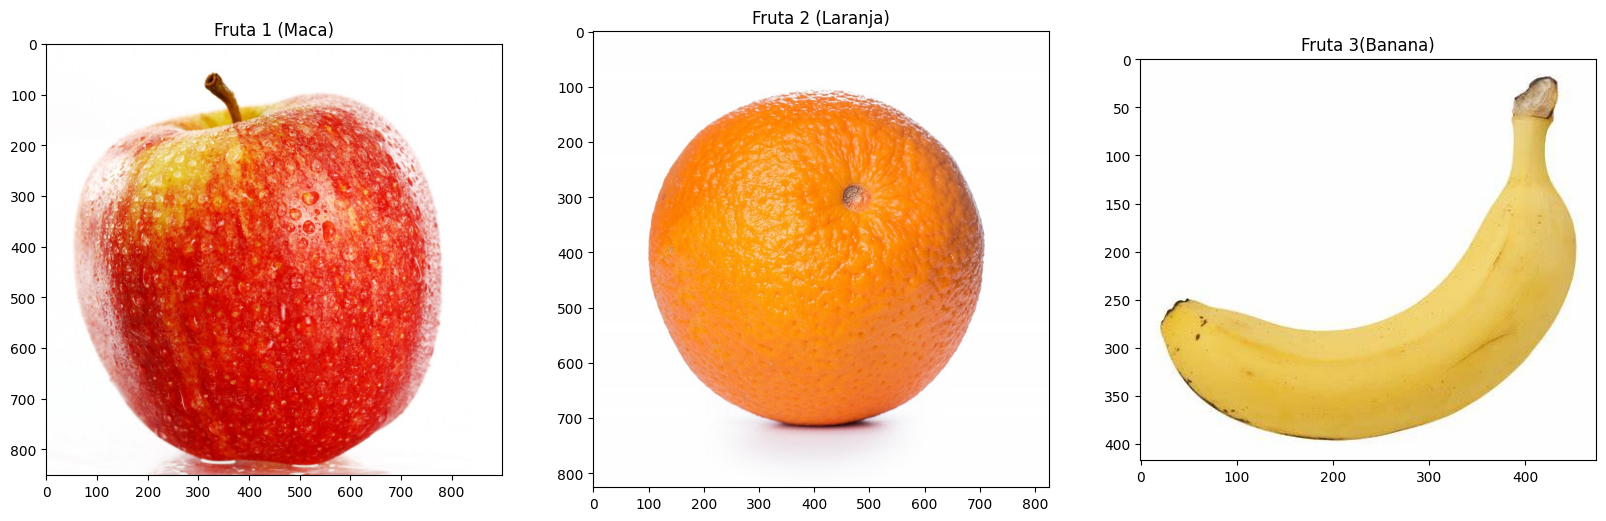

In [12]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("Fruta 1 (Maca)")
plt.imshow(fruta_1)
plt.subplot(132)
plt.title("Fruta 2 (Laranja)")
plt.imshow(fruta_2)
plt.subplot(133)
plt.title("Fruta 3(Banana)")
plt.imshow(fruta_3)
plt.show()


Aqui nós exibimos essas imagens

## Preparação dos dados

In [13]:
frutas_caminho = "imagens/frutas/"
lista_arq_frutas = [f for f in listdir(frutas_caminho) if isfile(join(frutas_caminho, f))]

In [14]:
lista_arq_frutas[0]

's03_10.jpg'

In [15]:
len(lista_arq_frutas)

45

In [16]:
frutas_path_treino = "imagens/treino/"
frutas_path_teste = "imagens/teste/"

if not path.exists(frutas_path_treino):
  makedirs(frutas_path_treino)

if not path.exists(frutas_path_teste):
  makedirs(frutas_path_teste)

for arq in lista_arq_frutas:
  fruta = arq[1:3]
  numero = arq[4:6]
  if int(numero) <= 10:
    shutil.copyfile(frutas_caminho + arq, frutas_path_treino + arq)
  else:
    shutil.copyfile(frutas_caminho + arq, frutas_path_teste + arq)

Neste bloco do código nós criamos uma lista de todos os arquivos de imagem no diretório. Na sequência é dividido em conjuntos de treinamento e teste, onde, as 10 primeiras imagens de cada fruta vão para treinamento e as demais vão para teste.

## Padronização de imagens

In [17]:
def padronizar_imagem(imagem_caminho):
  imagem = cv2.imread(imagem_caminho, cv2.IMREAD_GRAYSCALE)
  imagem = cv2.resize(imagem,(200,200), interpolation=cv2.INTER_LANCZOS4)
  return imagem

Essa função lê as imagens e converte em uma escala de cinza e redimensiona.

## Preparação dos dados de treinamento e teste

In [18]:
list_frutas_treino = [
    f for f in listdir(frutas_path_treino) if isfile(join(frutas_path_treino,f))
]

list_frutas_teste = [
    f for f in listdir(frutas_path_teste) if isfile(join(frutas_path_teste,f))
]

In [19]:
dados_treinamento, frutas = [], []

In [20]:
for i, arq in enumerate(list_frutas_treino):
  imagem_path = frutas_path_treino + arq
  imagem = padronizar_imagem(imagem_path)
  dados_treinamento.append(imagem)
  fruta = arq[1:3]
  frutas.append(int(fruta,10))

In [21]:
dados_teste, frutas_teste = [], []

In [22]:
for i, arq in enumerate(list_frutas_teste):
  imagem_path = frutas_path_teste + arq
  imagem = padronizar_imagem(imagem_path)
  dados_teste.append(imagem)
  fruta = arq[1:3]
  frutas_teste.append(int(fruta))

Neste bloco nós criamos listas de todas as imagens de treinamento e teste. Em seguida, lê cada imagen, padroniza e adiciona na pasta de treinamento ou teste.

## Treinamento do modelo

In [23]:
from numpy.core.multiarray import dtype
frutas = np.asarray(frutas, dtype=np.int32)
frutas_teste = np.asarray(frutas_teste, dtype=np.int32)

/tmp/ipython-input-1587078549.py:1: DeprecationWarning: numpy.core.multiarray is deprecated and has been renamed to numpy._core.multiarray. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.multiarray.dtype.
  from numpy.core.multiarray import dtype


In [24]:
modelo_einge = cv2.face.EigenFaceRecognizer_create()

In [25]:
modelo_einge.train(dados_treinamento,frutas)

Aqui, nós pegamos a frutas rotuladas e convertemos em arrays de numpy e utilizamos o modelo EigenFaceRecognizer é criado e treinado.

## Visualização de algumas previsões

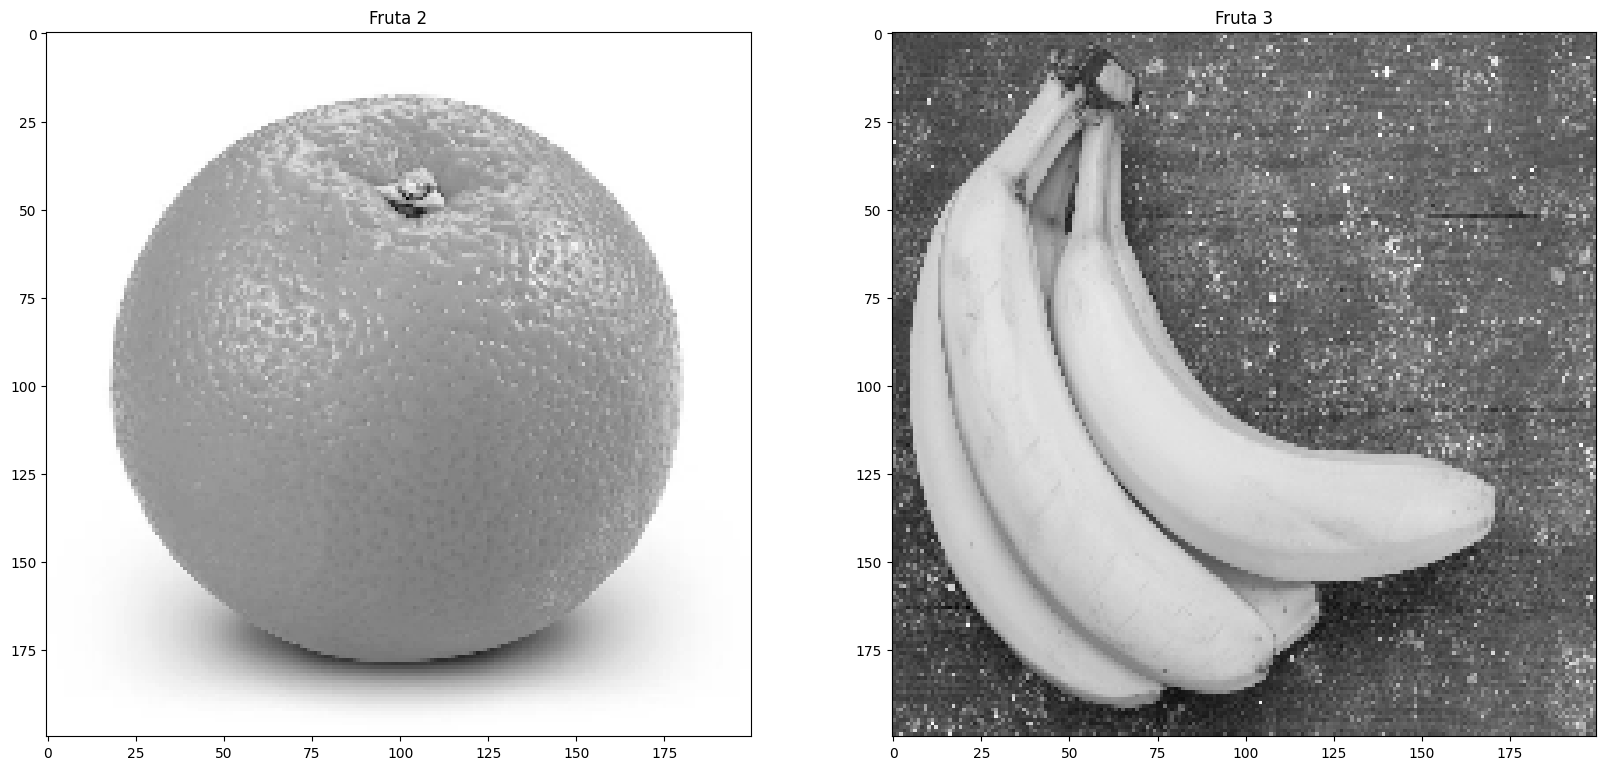

In [31]:
plt.figure(figsize=(20,10))

a = randint(0,14)
b = randint(0,14)
plt.subplot(121)
plt.title("Fruta " + str(frutas_teste[a]))
plt.imshow(dados_teste[a], cmap="gray")

plt.subplot(122)
plt.title("Fruta " + str(frutas_teste[b]))
plt.imshow(dados_teste[b], cmap="gray")

plt.show()

Aqui nós selecionamos duas imagens aleatórias do conjunto de testes e exibe.

## Previsão e avaliação do modelo

In [34]:
previsoes = []
for imagem in dados_teste:
    label, confidence = modelo_einge.predict(imagem)
    previsoes.append(label)

# Calculando a acurácia
acuracia = accuracy_score(frutas_teste, previsoes)
print("Acurácia: {:.2f}%".format(acuracia * 100))

Acurácia: 66.67%


E finalmente, o modelo é usado para prever as imagens de teste e então calculamos a acurácia do modelo comparando os rótulos previstos com os rótulos reais.